# Project: twitter

## Twitter Accounts: 
    Narendra Modi(@narendramodi),
    Randy Orton(@RandyOrton),
    Rakul Preet singh(@Rakulpreet)

# Retreiving twitter data

In the below code, we do the following:
- importing all the modules
- importing twitter data of all the above three accounts and storing that data in the files.

In [12]:
import tweepy
from twitter_keys import consumer_key, consumer_secret, access_token, access_secret
import pickle
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

#First twitter account
public_tweets1 = api.user_timeline('narendramodi')


with open('modi.pkl','wb') as f:
    pickle.dump(public_tweets1,f)

#Second twitter acount
public_tweets2 = api.user_timeline('RandyOrton')

with open('randy.pkl','wb') as f:
    pickle.dump(public_tweets2,f)

#Third twitter account
public_tweets3 = api.user_timeline('Rakulpreet')

with open('rakul.pkl','wb') as f:
    pickle.dump(public_tweets3,f)

## Read from pickled files

Below code is loading the above pickled data and storing them in temporary variables public_tweets1,public_tweets2 and public_tweets3

In [14]:
#Loading all three twitter accounts
with open('modi.pkl','rb') as f:
    public_tweets1 = pickle.load(f)

with open('randy.pkl','rb') as f:
    public_tweets2 = pickle.load(f)

with open('rakul.pkl','rb') as f:
    public_tweets3 = pickle.load(f)

### Description of analysis steps (markdown):
1) Perform Sentiment Analysis by using functions get_sentiments() and split_sentiments() which are defined below by the user 

2) In get_sentiments() we do analyse the txet using SentimentIntensityAnalyzer() and return polarity_scores for the given input text.

3) Then perform this get_sentiments() for each tweet of each account and append to a list.

4) In split_sentiments() we split the positive, negative and neutral sentiments from the list and store them in three variables and return those varibles.

5) we import matplotlib and add a figure and axes to plot the graph for the results obtained from above functions defined.

6) we take each twitter account tweets and perform split_sentiments() function on the lists obtained from performing the get_sentiments() function and store them in their respective variables.

7) Now we set the title and labels for x-axis,y-axis adn z-axis.

8) Then plot the values on the 3d graph using scatter() function.

9) Then create a legend of what marker defines what twitter account using labels and plt.legend() function.

10) Now we create two 2d graph by using scatter() function 
    - one graph fro Positive Vs Neutral Sentiments
    - one graph for Negative Vs Neutral Sentiments

# Sentiment Analysis

Below code is defining the function about analysing the sentiment intensity of the tweets and returning the polarity scores for the tweet.

In [15]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

def get_sentiments(text):
    analyzer = SentimentIntensityAnalyzer()
    return analyzer.polarity_scores(text)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\S534629\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Below code is calling the above function and printing the sentiments for all the tweets of each account.

In [61]:
import pickle

print('Narendra Modi account sentiment analysis:')
list1=list(get_sentiments(tweet.text) for tweet in public_tweets1)
print(list1)

print('\nRandy Orton account sentiment analysis:')
list2=list(get_sentiments(tweet.text) for tweet in public_tweets2)
print(list2)

print('\nRakul preet singh account sentiment analysis:')
list3=list(get_sentiments(tweet.text) for tweet in public_tweets3)
print(list3)

Narendra Modi account sentiment analysis:
[{'neg': 0.0, 'neu': 0.474, 'pos': 0.526, 'compound': 0.9042}, {'neg': 0.0, 'neu': 0.877, 'pos': 0.123, 'compound': 0.4215}, {'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'compound': 0.4939}, {'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'compound': 0.4019}, {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.7506}, {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.8126}, {'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'compound': 0.6705}, {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.5411}, {'neg': 0.0, 'neu': 0.568, 'pos': 0.432, 'compound': 0.5859}, {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.8012}, {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4404}, {'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.7263}, {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.8625}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'compound': 0.3818}, {'neg': 0.0, 'neu': 0.891, 'pos': 

Below code is used to split the sentiments in three different variables and return them.

In [62]:
def split_sentiments(sentiments):
    xs= [sent['neg'] for sent in sentiments]
    ys= [sent['neu'] for sent in sentiments]
    zs= [sent['pos'] for sent in sentiments]
    
    return xs,ys,zs

## Representation of above analysis in graph:


Below graph was to plot a 3d graph showing Negative, Positive and Neutral Sentiments of each tweet in each twitter account

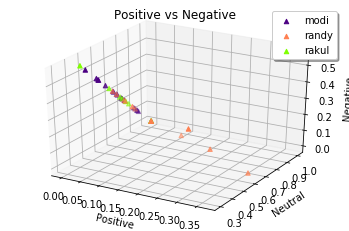

In [66]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig=plt.figure()
ax= fig.add_subplot(111, projection='3d')

modiX,modiY,modiZ=split_sentiments(list1)
randyX,randyY,randyZ=split_sentiments(list2)
rakulX,rakulY,rakulZ=split_sentiments(list3)

ax.set_title("Positive vs Negative")
ax.set_xlabel('Positive')
ax.set_ylabel('Neutral')
ax.set_zlabel('Negative')

ax.scatter(modiX,modiY,modiZ, color='indigo',marker='^',label='modi')
ax.scatter(randyX,randyY,randyZ, color='coral',marker='^',label='randy')
ax.scatter(rakulX,rakulY,rakulZ, color='chartreuse',marker='^',label='rakul')
plt.legend(loc='upper right', shadow=True)
plt.show()

Below code is to draw a 2d graph for Positive Vs Neutral Sentiments

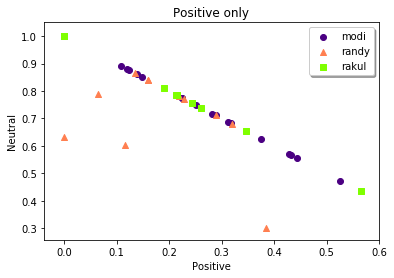

In [64]:
plt.xlabel('Positive')
plt.ylabel('Neutral')
plt.title('Positive only')
plt.scatter(modiZ,modiY, c='indigo', marker = 'o',label='modi')
plt.scatter(randyZ,randyY,c='coral', marker = '^',label='randy')
plt.scatter(rakulZ,rakulY, c='chartreuse', marker = 's',label='rakul')
plt.legend(loc='upper right', shadow=True)
plt.show()

Below code is to draw a 2d graph for Negative Vs Neutral Sentiments

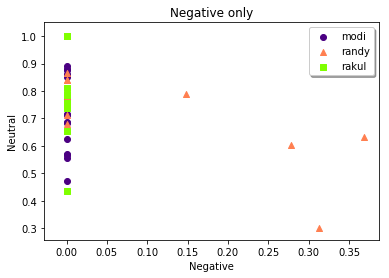

In [65]:
plt.xlabel('Negative')
plt.ylabel('Neutral')
plt.title('Negative only')
plt.scatter(modiX,modiY, c='indigo', marker = 'o',label='modi')
plt.scatter(randyX,randyY,c='coral', marker = '^',label='randy')
plt.scatter(rakulX,rakulY, c='chartreuse', marker = 's',label='rakul')
plt.legend(loc='upper right', shadow=True)
plt.show()

# Conclusion

 The data shows that all three users are more positive than negative. while @narendramodi and @RandyOrton are closely clustered, @Rakulpreet is more positive sentiments of her tweets and covers a wide spread. Through the 3D graph, we can observe that @RandyOrton is more towards neutral sentiments. But when we see Positive and Negative Sentiments seperately, we know that he tend to Negative sentiments more often than @narendramodi who is equal in terms of Positive sentiments. Whereas @Rakulpreet always have most of her tweets on the Positive Sentiments than the other two persons. Considering all the data that we have collected we can say that @narendramodi was most positive, @RandyOrton was most Negative and @Rakulpreet was most Positive.